<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Data_Sprint_38_The_Kvasir_Capsule_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement
 
Artificial intelligence (AI) is predicted to have profound effects on the future of video capsule endoscopy (VCE) technology.The potential lies in improving anomaly detection while reducing manual labour. However, medical data is often sparse and unavailable to the research community, and qualified medical personnel rarely have time for the tedious labelling work.

## Objective
 

You are required to build a machine learning model to recognize the disease label of the respective images.

## Content
 

The small bowel constitutes the gastrointestinal (GI) tract’s mid-part, situated between the stomach and the large bowel. It is three to four meters long and has a surface of about 30 m^2, including the surface of the villi, and plays a crucial role in absorbing nutrients. Therefore, disorders in the small bowel may cause severe growth retardation in children and nutrient deﬁciencies in children and adults. 

This organ may be affected by 
**chronic diseases**, like 
* Crohn’s disease, 
* coeliac disease, and 
* angiectasis

or  **malignant diseases** like 
* lymphoma and 
* adenocarcinoma. 

These diseases may represent a substantial health challenge for both patients and society, and a thorough examination of the lumen is frequently necessary to diagnose and treat them. However, the small bowel, due to its anatomical location, is less accessible for inspection by ﬂexible endoscopes commonly used for the upper GI tract and the large bowel. Since early 2000, video capsule endoscopy (VCE) has been used, usually as a complementary test for patients with GI bleeding. 

A VCE consists of a small capsule containing a wide-angle camera, lightsources, batteries, and other electronics. The patient swallows the capsule, which then captures a video as it moves passively through the GI tract. A recorder, carried by the patient or included in the capsule, stores the video before a medical expert assesses it after the procedure. 

[Source of information: Reasearch paper: Kvasir-Capsule, a video capsule endoscopy dataset]

## Mount Drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Download the images

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1yDcNMTI-8Zq2Mvs8qe7pLNpPx4BW5Yta',
dest_path='/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule.zip',unzip=True)

Unzipping...Done.


## Import Data Science packages

In [ ]:
#changing filename to paths
import os
import pandas as pd
import numpy as np
import PIL
import cv2
#
import seaborn as sns
import matplotlib.pyplot as plt
#
import warnings
warnings.filterwarnings("ignore")
#
%matplotlib inline

## Import Data

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/Training_set.csv")
test_data = pd.read_csv("/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/Testing_set.csv")

In [ ]:
train_data.head()

,filename,label
0,Image_1.jpg,Normal clean mucosa
1,Image_2.jpg,Normal clean mucosa
2,Image_3.jpg,Foreign body
3,Image_4.jpg,Normal clean mucosa
4,Image_5.jpg,Normal clean mucosa


In [ ]:
train_data.shape

(37790, 2)

In [ ]:
test_data.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [ ]:
test_data.shape

(9448, 1)

## Add the complete path for the training images

In [ ]:
paths = [os.path.join("/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/train", x) for x in train_data['filename']]
test_paths = [os.path.join("/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/test", x) for x in test_data['filename']]

In [ ]:
train_data['image_path'] = paths
test_data['image_path'] = test_paths

train_data.drop(['filename'], axis = 1, inplace=True)
test_data.drop(['filename'], axis = 1, inplace=True)

In [ ]:
file_paths = train_data.image_path.values.tolist()
labels = train_data.label.values.tolist()

In [ ]:
train_data.head()

,label,image_path
0,Normal clean mucosa,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...
1,Normal clean mucosa,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...
2,Foreign body,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...
3,Normal clean mucosa,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...
4,Normal clean mucosa,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...


## Function to preproces images

In [ ]:
def preProcess_Image(image):
  img = cv2.imread(image)
  img = cv2.resize(img, (224, 224))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0,0), 512/10), -4, 128)
  img = cv2.equalizeHist(img[:, :, 0])
  #img = cv2.Canny(img, 80, 100)
  #kernel = np.ones((5, 5), np.uint8)
  #img = cv2.erode(img, kernel, iterations=3)
  return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Function to display the images

In [ ]:
def show_image(image,label):
  f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,10))
  orig_img = cv2.imread(image)
  orig_img = cv2.resize(orig_img, (224, 224))
  processed_img =  preProcess_Image(image)
  ax1.imshow(orig_img)
  ax2.imshow(processed_img)
  ax1.set_title(f'Original Image {label}')
  ax2.set_title(f'Processed Image {label}')

##Shape of the images after preprocessing

In [ ]:
preProcess_Image(file_paths[i]).shape

(224, 224, 3)

## Display Random  Training Images

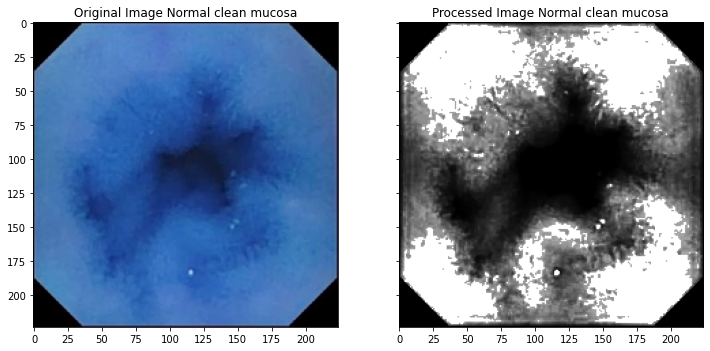

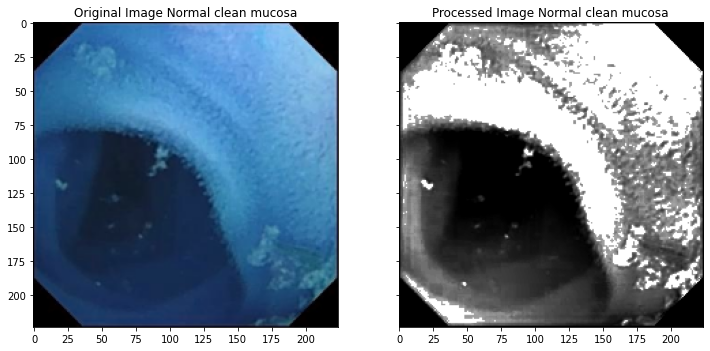

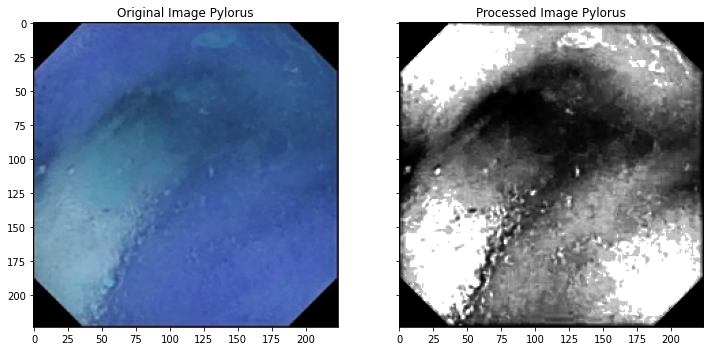

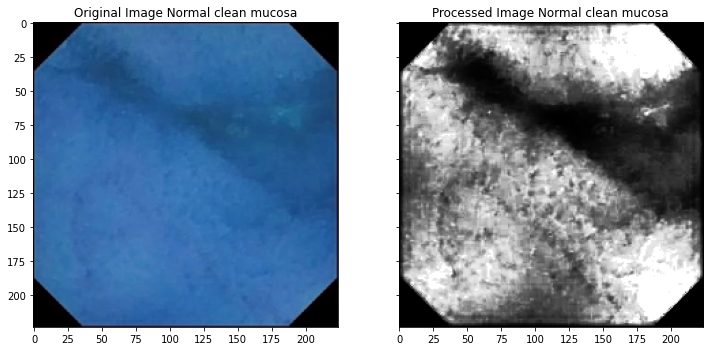

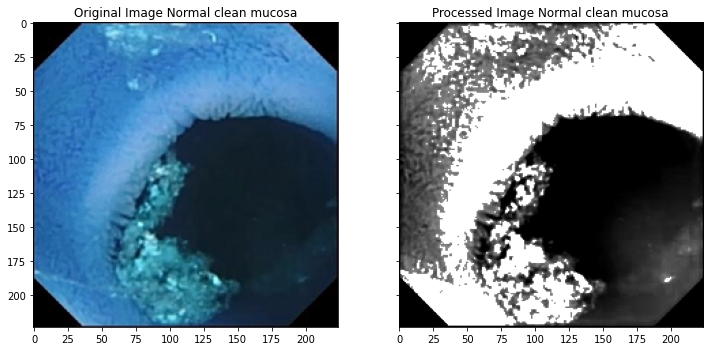

In [ ]:
for i in range(5):
  i = np.random.randint(1000,2000)
  show_image(file_paths[i],labels[i])

## Visualize Test Images

In [ ]:
def show_test_image(image):
  f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,10))
  orig_img = cv2.imread(image)
  orig_img = cv2.resize(orig_img, (224, 224))
  processed_img =  preProcess_Image(image)
  ax1.imshow(orig_img)
  ax2.imshow(processed_img)
  ax1.set_title(f'Original Test Image')
  ax2.set_title(f'Processed Test Image')

In [ ]:
test_images = test_data.image_path.values.tolist()

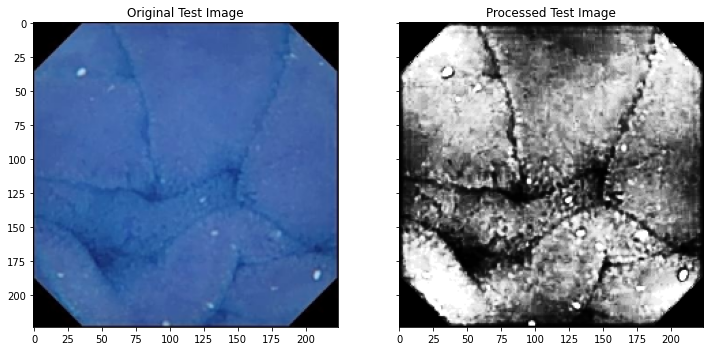

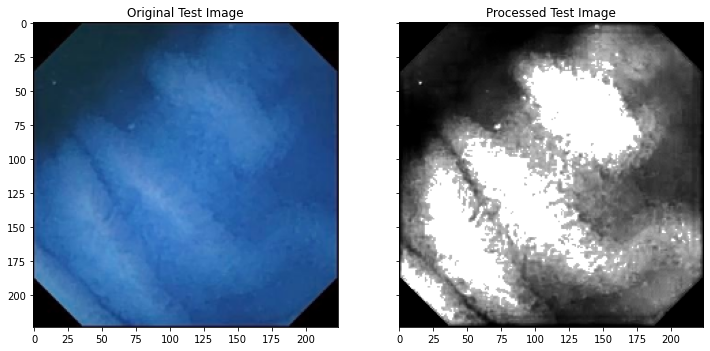

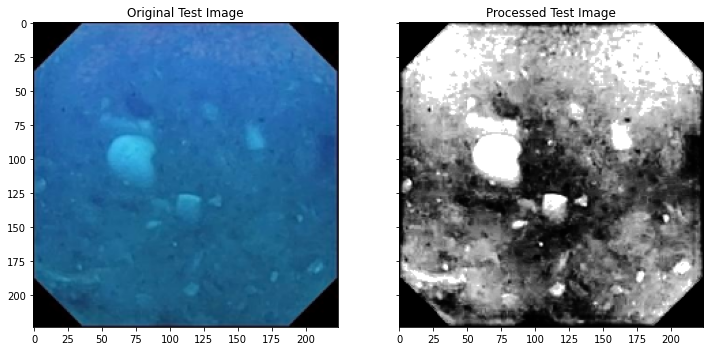

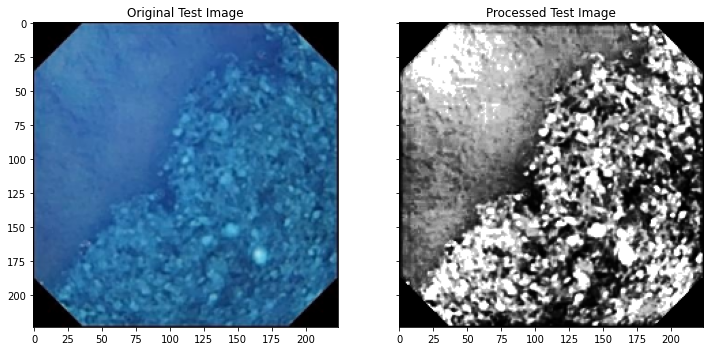

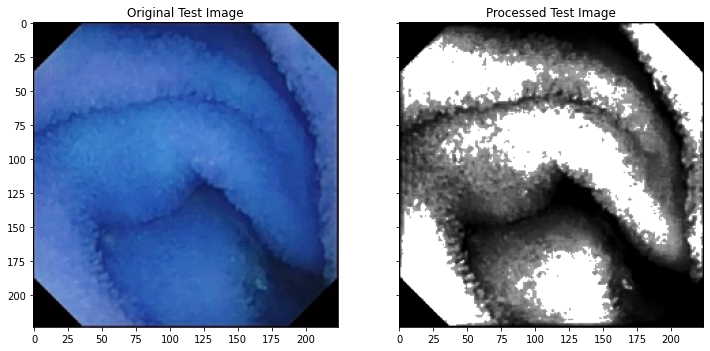

In [ ]:
for i in range(5):
  i = np.random.randint(1000,2000)
  show_test_image(test_images[i])

## Distribution of labels

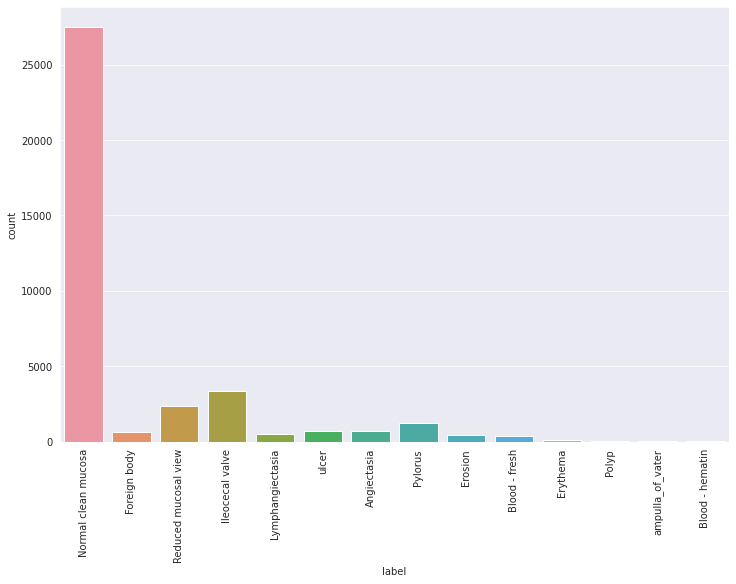

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.xticks(rotation =90)
sns.countplot(train_data.label)

## Count of each label

In [ ]:
train_data.label.value_counts()

Normal clean mucosa     27470
Ileocecal valve          3351
Reduced mucosal view     2325
Pylorus                  1223
Angiectasia               693
ulcer                     683
Foreign body              621
Lymphangiectasia          473
Erosion                   405
Blood - fresh             357
Erythema                  127
Polyp                      44
Blood - hematin            10
ampulla_of_vater            8
Name: label, dtype: int64

## Apply Startified kfolds to handle imbalanced dataset

In [ ]:
from sklearn.model_selection import StratifiedKFold
dfx = train_data.copy()
#assign default value to fold
dfx["kfold"] = -1

# Shuffle data
dfx = dfx.sample(frac=1).reset_index(drop=True)

kf = StratifiedKFold(n_splits=5)

for fold, (trn_, val_) in enumerate(kf.split(X=dfx, y=dfx.label.values)):
    print(len(trn_), len(val_))
    dfx.loc[val_, 'kfold'] = fold


30232 7558
30232 7558
30232 7558
30232 7558
30232 7558


In [ ]:
dfx.head()

,label,image_path,kfold
0,Normal clean mucosa,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,0
1,Normal clean mucosa,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,0
2,Ileocecal valve,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,0
3,Normal clean mucosa,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,0
4,Normal clean mucosa,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,0


In [ ]:
dfx.kfold.value_counts()

4    7558
3    7558
2    7558
1    7558
0    7558
Name: kfold, dtype: int64

In [ ]:
dfx.to_csv("/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/train_set_folds.csv",index=False)

## Building a classification module using pytorch lightning

In [ ]:
!pip install pytorch-lightning

     |████████████████████████████████| 819kB 4.1MB/s 
     |████████████████████████████████| 829kB 12.7MB/s 
     |████████████████████████████████| 645kB 17.6MB/s 
     |████████████████████████████████| 112kB 30.8MB/s 
     |████████████████████████████████| 10.6MB 17.3MB/s 
     |████████████████████████████████| 276kB 36.9MB/s 
     |████████████████████████████████| 1.3MB 33.2MB/s 
     |████████████████████████████████| 143kB 40.6MB/s 
     |████████████████████████████████| 296kB 37.0MB/s 
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491070 sha256=6ff849b31009ae51c09cb800c0898d86aef9662f55b02e93dc7e465ce7a74dca
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
ERROR: tensorflow 2.5.0 has requirement tensorboard~=2.5, but you'll have tensorboard 2.4.1 which is incompatible.
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully

In [ ]:
!pip install albumentations==0.4.6

     |████████████████████████████████| 122kB 4.2MB/s 
     |████████████████████████████████| 952kB 7.2MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-cp37-none-any.whl size=65175 sha256=bb388c4452f715bc2f98b8c44b5f1c1b20d2903d1b7f77b5e92c5141481cbef8
  Stored in directory: /root/.cache/pip/wheels/c7/f4/89/56d1bee5c421c36c1a951eeb4adcc32fbb82f5344c086efa14
Successfully built albumentations
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
!pip install timm

     |████████████████████████████████| 348kB 4.1MB/s 


In [ ]:
import os
import albumentations
from albumentations.pytorch import ToTensorV2
#
import pandas as pd
import numpy as np
#
import torch
import torch.nn as nn
from torch.nn import functional as F
from torchvision import models
from torch.utils.data import TensorDataset, DataLoader, Dataset
from torchvision.transforms import transforms
#
from sklearn import metrics, model_selection, preprocessing
#
import PIL
from PIL import Image
from PIL import ImageFilter

#

import timm

import pytorch_lightning as pl

from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint, LearningRateMonitor, BackboneFinetuning
# from pytorch_lightning.loggers import NeptuneLogger


import torchmetrics as tm

import warnings
warnings.filterwarnings('ignore')

from google.colab.patches import cv2_imshow

## Visualize the list of pretrained models available in timm

In [ ]:
timm.list_models()

['adv_inception_v3',
 'botnet26t_256',
 'botnet50ts_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'cspdarknet53',
 'cspdarknet53_iabn',
 'cspresnet50',
 'cspresnet50d',
 'cspresnet50w',
 'cspresnext50',
 'cspresnext50_iabn',
 'darknet53',
 'densenet121',
 'densenet121d',
 'densenet161',
 'densenet169',
 'densenet201',
 'densenet264',
 'densenet264d_iabn',
 'densenetblur121d',
 'dla34',
 'dla46_c',
 'dla46x_c',
 'dla60',
 'dla60_res2net',
 'dla60_res2next',
 'dla60x',
 'dla60x_c',
 'dla102',
 'dla102x',
 'dla102x2',
 'dla169',
 'dm_nfnet_f0',
 'dm_nfnet_f1',
 'dm_nfnet_f2',
 'dm_nfnet_f3',
 'dm_nfnet_f4',
 'dm_nfnet_f5',
 'dm_nfnet_f6',
 'dpn68',
 'dpn68b',
 'dpn92',
 'dpn98',
 'dpn107',
 'dpn131',
 'eca_nfnet_l0',
 'eca_nfnet_l1',
 'eca_vovnet39b',
 'ecaresnet26t'

## Define Configurations

In [ ]:
train_images = "/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/train"
test_images = "/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/test"
drive_path = "/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule"
#
trainset = "/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/train_set_folds.csv"
#
model_folder = "/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/models"
#
#model_name = "xception65"
model_name =  "densenet121"
pretrained = True
#
num_classes = 14
#
virtual_batch_size = 32
batch_size_train = 32
batch_size_val = 32
use_preprocess = True
#use_preprocess = False

max_epochs = 30
lr = 1e-4
weight_decay = 1e-3

nfolds = 5



In [ ]:
train_data = pd.read_csv(trainset)
dfx = train_data.copy()

In [ ]:
dfx.head()

,label,image_path,kfold
0,Normal clean mucosa,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,0
1,Normal clean mucosa,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,0
2,Ileocecal valve,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,0
3,Normal clean mucosa,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,0
4,Normal clean mucosa,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,0


In [ ]:
def f(r):
  if r == "ampulla_of_vater":
      return 0
  elif r == "Angiectasia":
      return 1
  elif r == "Blood - fresh":
      return 2
  elif r == "Blood - hematin":
      return 3
  elif r == "Erosion":
      return 4
  elif r == "Erythema":
      return 5
  elif r == "Foreign body":
      return 6
  elif r == "Ileocecal valve":
      return 7
  elif r == "Lymphangiectasia":
      return 8
  elif r == "Normal clean mucosa":
      return 9
  elif r == "Polyp":
      return 10
  elif r == "Pylorus":
      return 11
  elif r == "Reduced mucosal view":
      return 12
  else:
      return 13

In [ ]:
dfx['label'] = dfx['label'].apply(f)
dfx.head()

,label,image_path,kfold
0,9,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,0
1,9,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,0
2,7,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,0
3,9,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,0
4,9,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,0


In [ ]:
print(f"Number of labels = {dfx.label.nunique()}")

Number of labels = 14


##Check if certain .jpg files are empty


In [ ]:
img_list  = dfx.image_path.values.tolist()
empty_images = []
empty_index = []
for i,img in enumerate(img_list):
  if os.stat(img).st_size == 0:
    try:
      empty_images.append(img)
      empty_index.append(i)
    except:
      pass

In [ ]:
empty_images

['/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/train/Image_23443.jpg',
 '/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/train/Image_23447.jpg',
 '/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/train/Image_23442.jpg',
 '/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/train/Image_23444.jpg',
 '/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/train/Image_23446.jpg',
 '/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/train/Image_15616.jpg',
 '/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/train/Image_23440.jpg',
 '/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/train/Image_23441.jpg',
 '/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/train/Image_23445.jpg',
 '/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/train/Image_23449.jpg',
 '/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/train/Image_23448.jpg',
 '/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/train/Image_15615.jpg',
 '/content/drive/MyDrive/dphi/Kvasir/The

In [ ]:
preProcess_Image("'/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/train/Image_15615.jpg'")

error: ignored

In [ ]:
plt.imshow(PIL.Image.open("'/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/train/Image_15617.jpg'"))

FileNotFoundError: ignored

In [ ]:
empty_index

[822,
 3957,
 12925,
 17125,
 17355,
 18074,
 19546,
 21053,
 24862,
 26938,
 29698,
 32821,
 35500,
 36382]

In [ ]:
dfx.shape

(37790, 3)

In [ ]:
dfx = dfx[~dfx['image_path'].isin(empty_images)]

In [ ]:
dfx.shape

(37776, 3)

In [ ]:
def scaling(X, high, low):
  X_std = (X - X.min()) / (X.max() - X.min())
  X_scaled = X_std * (high - low) + low
  return X_scaled

## Prepare Dataset -Train

In [ ]:
class Data(Dataset):
    def __init__(self, dataframe, transform, one_hot = False, use_preprocess = True):
        super().__init__()
        self.dataframe = dataframe
        self.transform = transform
        self.one_hot = one_hot
        self.use_preprocess = use_preprocess
    
    def __len__(self):
        return self.dataframe.shape[0]
    
    def __getitem__(self, item):
        img_path = self.dataframe.iloc[item]['image_path']
        target = self.dataframe.iloc[item]['label']
        
        if self.use_preprocess :
          image = preProcess_Image(img_path)
        if self.transform is not None:
            image = Image.open(img_path).convert('RGB')
            image = np.asarray(image)
            image = self.transform(image = image)['image']
        if self.one_hot:
            return image, F.one_hot(torch.tensor(target), num_classes=num_classes)
        else:
            return image, torch.tensor(target)


## Prepare Dataset -Test

In [ ]:
test_data.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


## Data Augmentation

In [ ]:
train_aug = albumentations.Compose([
            albumentations.Rotate(limit = 15, p = 0.3),
            albumentations.OneOf([
                albumentations.Cutout(num_holes=8, max_h_size=2, max_w_size=2, fill_value=0, always_apply=False),
                albumentations.ElasticTransform()
            ], p = 0.5),
            albumentations.Normalize(
                mean=[0.485, 0.456, 0.406], 
                std=[0.229, 0.224, 0.225], 
                max_pixel_value=255.0, 
                p=1.0
            ), ToTensorV2(),
            ])
  
        
val_aug = albumentations.Compose([
            albumentations.Normalize(
                mean=[0.485, 0.456, 0.406], 
                std=[0.229, 0.224, 0.225], 
                max_pixel_value=255.0, 
                p=1.0
            ), ToTensorV2(),
])

In [ ]:
def preprocess_image(img_array):
  gray = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
  # smooth = cv2.medianBlur(gray, 3)
  smooth = cv2.GaussianBlur(gray,(3,3),0)
  eql = cv2.equalizeHist(smooth)
  return cv2.cvtColor(eql, cv2.COLOR_GRAY2RGB)


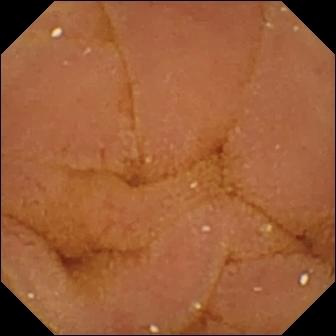

In [ ]:
PIL.Image.open(img_list[1])

In [ ]:
class TestData(Dataset):
    def __init__(self, dataframe, transform, use_preprocess = True):
        super().__init__()
        self.dataframe = dataframe
        self.transform = transform
        self.use_preprocess = use_preprocess
    
    def __len__(self):
        return self.dataframe.shape[0]
    
    def __getitem__(self, item):
      img_id = self.dataframe.iloc[item]['filename']
      img_path = os.path.join(test_images,img_id)
      
      if self.use_preprocess:
         image = preProcess_Image(img_path)
      if self.transform is not None:
        image = Image.open(img_path).convert('RGB')
        image = np.asarray(image)
        image = self.transform(image = image)['image']

      return image

## Build Classifier

In [ ]:
class CNN_Classifier(nn.Module):
    def __init__(self, model_name, pretrained = True):
        super().__init__()
        self.cnn = timm.create_model(model_name = model_name, pretrained=pretrained)
        self.classifier = nn.Sequential(nn.Dropout(0.1),
                                    nn.LeakyReLU(),
                                    nn.Linear(1000,num_classes))
        
    def forward(self, x):
        output = self.cnn(x)
        output = self.classifier(output)
        return output

## Build DataModule

In [ ]:
class DataModule(pl.LightningDataModule):

    def __init__(self, fold: int, train_batch_size: int, valid_batch_size: int, one_hot: bool = False):
        super().__init__()
        self.fold = fold
        self.train_batch_size = train_batch_size
        self.valid_batch_size = valid_batch_size
        self.one_hot = one_hot
        self.train_transform = train_aug
        self.valid_transform = val_aug

    def setup(self, stage: str = None):
        df_train = dfx[dfx.kfold != self.fold].reset_index(drop=True)
        df_valid = dfx[dfx.kfold == self.fold].reset_index(drop=True)

        df_train = df_train.reset_index(drop=True)
        df_valid = df_valid.reset_index(drop=True)

        self.train_dataset = Data(
            dataframe = df_train,
            transform = self.train_transform,
            one_hot = self.one_hot,
            use_preprocess = use_preprocess
        )

        self.valid_dataset = Data(
            dataframe = df_valid,
            transform = self.valid_transform,
            one_hot = self.one_hot,
            use_preprocess = use_preprocess
        )     

    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size = self.train_batch_size, shuffle = True, pin_memory = True, num_workers = 4, drop_last=True)
      
    def val_dataloader(self):
        return DataLoader(self.valid_dataset, batch_size = self.valid_batch_size, shuffle = False, pin_memory = True, num_workers = 4, drop_last=True)

## Lightning Module

In [ ]:
class CNNModule(pl.LightningModule):
    def __init__(self, model_name, learning_rate = 1e-4, use_scheduler = True, pretrained = True):
        super().__init__()

        self.net = CNN_Classifier(model_name, pretrained = pretrained)

        self.loss_function = nn.BCEWithLogitsLoss()
        self.learning_rate = learning_rate
        self.use_scheduler = use_scheduler
        self.save_hyperparameters()

        self.train_metric = tm.Accuracy()
        self.valid_metric = tm.Accuracy()

    def forward(self, x):
        output = self.net(x)
        return output

    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(self.parameters(), lr=self.learning_rate, weight_decay=weight_decay)
        #lr_scheduler = {
        #"scheduler":torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
        #        optimizer, T_0=5, T_mult=1, eta_min=1e-6, last_epoch=-1, verbose = True
        #    ),
        #"name":"CosineAnnealingWarmRestarts",
        #}

        # lr_scheduler = {
        # "scheduler":torch.optim.lr_scheduler.OneCycleLR(optimizer, 1e-4, total_steps=None, epochs=10, steps_per_epoch=len(self.train_dataloader()), pct_start=0.3, 
        #                                                 anneal_strategy='cos', cycle_momentum=True, base_momentum=0.85, max_momentum=0.95, div_factor=25.0, 
        #                                                 final_div_factor=10000.0, three_phase=False, last_epoch=-1, verbose=True),
        # "name":"OneCycleLR",
        # "interval":"step"
        # }

        lr_scheduler = {
         "scheduler":torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, 
                                                                 threshold=0.001, threshold_mode='rel', cooldown=0, min_lr=1e-6, eps=1e-08, verbose = True),
         "name":"ReduceLROnPlateau",
         "monitor":"Validation_loss_epoch",
         "interval":"epoch"
          }

        # lr_scheduler = {
        # "scheduler":torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=  [3,7], gamma=0.1, last_epoch=-1, verbose=True),
        # "name":"MultiStepLR",
        # }

        if self.use_scheduler:
              return [optimizer], [lr_scheduler]
        else:
              return optimizer

    def training_step(self, batch, batch_idx):
        image, targets = batch
        y_pred = self.forward(image)
        loss = self.loss_function(y_pred, targets.type_as(y_pred))
        train_acc_batch = self.train_metric(torch.sigmoid(y_pred), targets)
        self.log('train_acc_batch', train_acc_batch, prog_bar = True)
        self.log('train_loss_batch', loss)
        return {
            'loss': loss,
            'train_acc_batch': train_acc_batch,
        }

    def training_epoch_end(self, outputs):
        current_train_loss = torch.stack([x['loss'] for x in outputs]).mean()
        current_train_acc = self.train_metric.compute()
        self.log('Training_loss_epoch', current_train_loss)
        self.log('Training_ACC_epoch', current_train_acc)

    def validation_step(self, batch, batch_idx):
        image, targets = batch
        y_pred = self.forward(image)
        loss = self.loss_function(y_pred, targets.type_as(y_pred))
        val_acc_batch = self.valid_metric(torch.sigmoid(y_pred), targets)
        self.log('val_acc_batch', val_acc_batch)
        self.log('val_loss_batch', loss)
        return {
          'val_loss': loss,
          'val_acc_batch': val_acc_batch
          }

    def validation_epoch_end(self, outputs):
        current_val_loss = torch.stack([x['val_loss'] for x in outputs]).mean()
        current_val_acc = self.valid_metric.compute()
        print(f"Epoch {self.current_epoch}: Loss: {current_val_loss:4f}: Acc:{current_val_acc:4f}")
        self.log("Validation_loss_epoch", current_val_loss)
        self.log('Validation_ACC_epoch', current_val_acc)

## Test the Dataset class defined for training data

In [ ]:
t  = Data(dataframe = dfx,
            transform = train_aug,
            one_hot = False,
            use_preprocess = use_preprocess
        )

In [ ]:
t.__len__()

37776

In [ ]:
t.__getitem__(1)

(tensor([[[ 0.7933,  0.7762,  0.7762,  ..., -2.1008, -2.1008, -2.1179],
          [ 0.8104,  0.8104,  0.7933,  ..., -2.1008, -2.1008, -2.1179],
          [ 0.8447,  0.8447,  0.8104,  ..., -2.1008, -2.1008, -2.1008],
          ...,
          [ 0.8961,  0.8961,  0.9132,  ..., -2.1179, -2.1179, -2.1179],
          [ 0.8789,  0.8789,  0.8961,  ..., -2.1179, -2.1179, -2.1179],
          [ 0.8447,  0.8447,  0.8447,  ..., -2.1179, -2.1179, -2.1179]],
 
         [[-0.0924, -0.0924, -0.0924,  ..., -2.0182, -2.0182, -2.0357],
          [-0.0574, -0.0574, -0.0749,  ..., -2.0182, -2.0357, -2.0357],
          [-0.0224, -0.0224, -0.0574,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [ 0.0301,  0.0476,  0.0651,  ..., -2.0357, -2.0357, -2.0357],
          [ 0.0126,  0.0126,  0.0301,  ..., -2.0357, -2.0357, -2.0357],
          [-0.0224, -0.0224, -0.0224,  ..., -2.0357, -2.0357, -2.0357]],
 
         [[-0.6541, -0.6541, -0.6715,  ..., -1.8044, -1.8044, -1.8044],
          [-0.6541, -0.6715,

In [ ]:
test = TestData(dataframe = test_data, transform = val_aug, use_preprocess = True)

In [ ]:
test.__len__()

9448

In [ ]:
test.__getitem__(1)

tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1

## We can use Binary Cross Entropy for multiclass classification .

Each of your classes need to have a sigmoid output which makes each prediction independent of other classes. there you can use binary cross entropy to calculate the overall error/loss.

In [ ]:
dfx.head()

,label,image_path,kfold
0,9,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,0
1,9,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,0
2,7,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,0
3,9,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,0
4,9,/content/drive/MyDrive/dphi/Kvasir/The Kvasir-...,0


In [ ]:
dm = DataModule(fold = 0, train_batch_size =32, valid_batch_size=16, one_hot = True)
    

In [ ]:
dm.setup()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


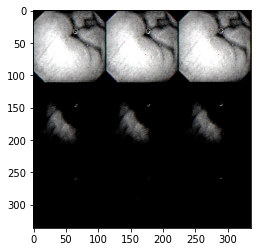

In [ ]:
for x,y in dm.train_dataloader():
  plt.imshow(x[0].reshape(336,336,3))
  break

In [ ]:
os.path.join(model_folder,model_name )

'/content/drive/MyDrive/dphi/Kvasir/The Kvasir-Capsule/models/densenet121'

In [ ]:
def run(fold):

    print(f"Running Fold-{fold}")


    check_path = os.path.join(model_folder,model_name )

    checkpointer = ModelCheckpoint(
    monitor = 'Validation_loss_epoch',
    dirpath = check_path,
    filename =  f"{model_name}" + "-{epoch:02d}-{Validation_loss_epoch:2f}",
    mode = 'min',
    save_top_k = 1,
    save_weights_only = True,
    verbose = True
    )

    early_stopping = EarlyStopping(
    monitor = 'Validation_loss_epoch',
    patience = 5,
    mode = 'min',
    verbose = True
    )

    learning_rate_monitor = LearningRateMonitor(logging_interval = 'epoch')

    callbacks = [checkpointer, 
                 early_stopping, 
                 learning_rate_monitor,
                 ]
    
    
    model = CNNModule(model_name = model_name, 
                      learning_rate=lr, 
                      pretrained = pretrained)
    
    dm = DataModule(fold = fold, 
                    train_batch_size = batch_size_train, 
                    valid_batch_size=batch_size_val, one_hot = True)
    
    trainer = pl.Trainer(
    callbacks = callbacks,
    max_epochs = max_epochs,
    #max_epochs = 1,
    auto_lr_find=True,
    progress_bar_refresh_rate = 5,
    accumulate_grad_batches=int(virtual_batch_size/batch_size_train),
    gpus = 1,
    precision = 16,
    move_metrics_to_cpu = True 
    )

    #trainer.tune(model, dm)
    trainer.fit(model,dm)

## resnext50_32x4d- run 0

In [ ]:
run(0)

Running Fold-0


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/densenet121_ra-50efcf5c.pth" to /root/.cache/torch/hub/checkpoints/densenet121_ra-50efcf5c.pth
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
Using native 16bit precision.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type              | Params
----------------------------------------------------
0 | net           | CNN_Classifier    | 8.0 M 
1 | loss_function | BCEWithLogitsLoss | 0     
2 | train_metric  | Accuracy          | 0     
3 | valid_metric  | Accuracy          | 0     
----------------------------------------------------
8.0 M     Trainable params
0         Non-trainable params
8.0 M     Total params
31.971    Total estimated model params size (MB)


Epoch 0: Loss: 0.646003: Acc:0.616071


https://pytorch-lightning.readthedocs.io/en/stable/advanced/lr_finder.html

## Building Inference

In [ ]:
class CONFIG_INFERENCE():
  test_images = "/content/KneeXray/test"
  testset = "/content/KneeXray/sample_submission.csv"

  model_paths = [
                 '/content/drive/MyDrive/Projects/DPHI-Knee_Osteoarthritis/models/resnext50_32x4d/0/resnext50_32x4d-epoch=02-Validation_loss_epoch=0.283553.ckpt',
                 '/content/drive/MyDrive/Projects/DPHI-Knee_Osteoarthritis/models/resnext50_32x4d/1/resnext50_32x4d-epoch=03-Validation_loss_epoch=0.280259.ckpt',
                 '/content/drive/MyDrive/Projects/DPHI-Knee_Osteoarthritis/models/resnext50_32x4d/2/resnext50_32x4d-epoch=02-Validation_loss_epoch=0.285458.ckpt',
                 '/content/drive/MyDrive/Projects/DPHI-Knee_Osteoarthritis/models/resnext50_32x4d/3/resnext50_32x4d-epoch=02-Validation_loss_epoch=0.284261.ckpt',
                 '/content/drive/MyDrive/Projects/DPHI-Knee_Osteoarthritis/models/resnext50_32x4d/4/resnext50_32x4d-epoch=02-Validation_loss_epoch=0.282668.ckpt'
                 ]


  batch_size = 32

  device = ('cuda' if torch.cuda.is_available() else 'cpu')

#instantiate the class(object)
cfg_inference = CONFIG_INFERENCE()

## Test data augmentation

In [ ]:
test_aug = albumentations.Compose([
            albumentations.Normalize(
                mean=[0.485, 0.456, 0.406], 
                std=[0.229, 0.224, 0.225], 
                max_pixel_value=255.0, 
                p=1.0
            ), ToTensorV2(),
])

## Prepare Test Dataset

In [ ]:
dfx_test = test_data.copy()
test_dataset = TestData(dataframe=dfx_test, transform=test_aug)
test_dataloader = DataLoader(test_dataset, batch_size=cfg_inference.batch_size, shuffle = False)

## Function to load the weights of the trained model

In [ ]:
def load_model(path):
  w = torch.load(path, map_location=cfg_inference.device)
  m = CNNModule(model_name = cfg.model_name, pretrained = False)
  m.load_state_dict(w['state_dict'])
  return m.net

## Make Predictions -  average of all the results from 5 different folds

In [ ]:
from tqdm import tqdm
final_preds = None
for path in cfg_inference.model_paths:
  model = load_model(path)
  model.to(cfg_inference.device)
  temp_preds = None
  model.eval()
  for batch in tqdm(test_dataloader):
    images = batch.to(cfg_inference.device)
    preds = torch.sigmoid(model(images)).cpu().detach().numpy()
    if temp_preds is None:
        temp_preds = preds
    else:
        temp_preds = np.vstack((temp_preds, preds))
  
  if final_preds is None:
      final_preds = temp_preds
  else:
      final_preds += temp_preds
final_preds /= len(cfg_inference.model_paths)